#PREGUNTA
Salinas Vilar Maria Luciana:  
Modifica el modelo para que procese imágenes de tamaño 800x600
y los cuchillos esten entre los 40x40 pixeles como mínimo 
100x100 como máximo, lo otros tamañós no deben ser detectados

Found 1606 files belonging to 2 classes.


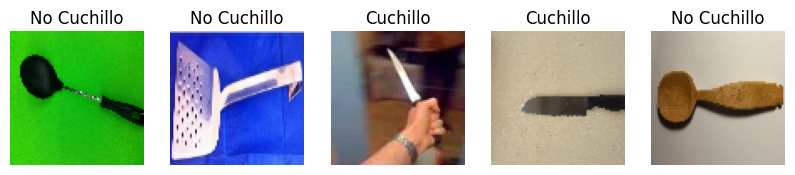

In [58]:
import matplotlib.pyplot as plt
import tensorflow as tf

dataset_dir = "knife_dataset++"

dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    image_size=(80, 80),
    batch_size=5,      
    shuffle=True,
)
for images, labels in dataset.take(1):
    # Mostrar imágenes como en TFDS
    plt.figure(figsize=(10, 10))
    for i in range(5):
        ax = plt.subplot(1, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Cuchillo" if labels[i] == 0 else "No Cuchillo")
        plt.axis("off")
    plt.show()





In [26]:
#cantidad de imagenes en 
import os 

URL = 'knife_dataset++/cuchillo'
print("hay:",len(os.listdir(URL))) 

URL = 'knife_dataset++/no_cuchillo'
print( "hay:",len(os.listdir(URL)))

hay: 795
hay: 811


In [ ]:
import os
import cv2
import numpy as np

# TAMANO_IMG = 80



ruta_dataset = "knife_dataset++"
categorias = ["cuchillo", "no_cuchillo"]

data_train = []
sizes = [40, 100]

for etiqueta, categoria in enumerate(categorias):
    ruta_clase = os.path.join(ruta_dataset, categoria)

    for filename in os.listdir(ruta_clase):
        ruta_imagen = os.path.join(ruta_clase, filename)

        img = cv2.imread(ruta_imagen)
        if img is None:
            continue

        if etiqueta == 0 :
            for size in sizes:
                IMG_RECORTADA = cv2.resize(img,(size,size))
                IMG_NUEVA = cv2.resize(IMG_RECORTADA ,(800,600))
                IMG_NUEVA = cv2.cvtColor(IMG_NUEVA, cv2.COLOR_BGR2GRAY) # convertir a escala de grises
                IMG_OUT = IMG_NUEVA.reshape(800, 600, 1) # cambiar el formato de las imagenes
                data_train.append([IMG_OUT, etiqueta])
                
                
        else:
            img = cv2.resize(img, (800,600)) # cambiar el tamnio de las imagenes
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convertir a escala de grises
            img = img.reshape(800, 600, 1) # cambiar el formato de las imagenes 
            data_train.append([img, etiqueta])


In [85]:
print(type(data_train[0]))
print(len(data_train[0]))
print(data_train[0][0].shape)
# print(data_train[1][0])


<class 'list'>
2
(800, 600, 1)


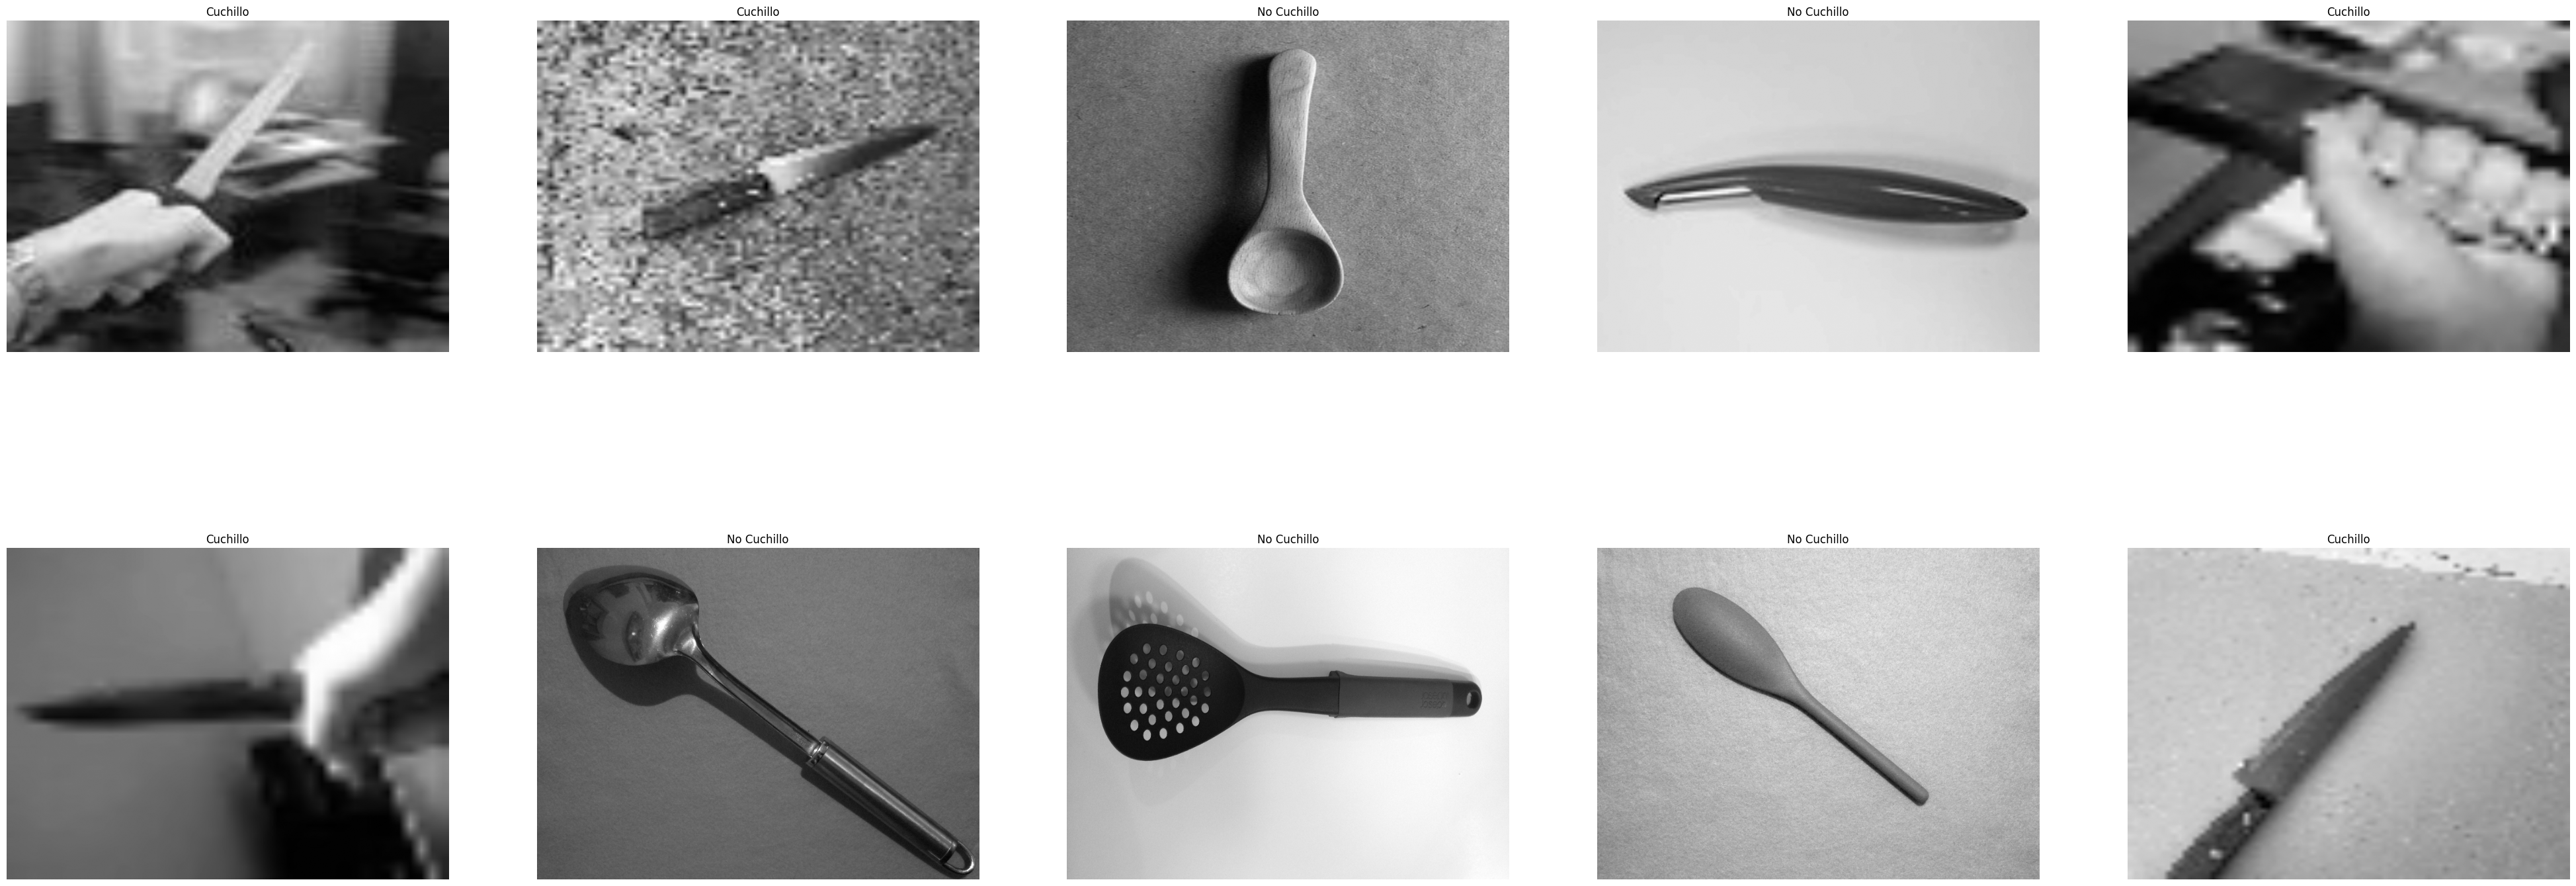

In [92]:
#mostrar como quedo las categorias aleatoriamente
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(50, 50))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    img, etiqueta = random.choice(data_train)
    plt.imshow(img.reshape(600, 800), cmap='gray')
    plt.title("Cuchillo" if etiqueta == 0 else "No Cuchillo") 
    plt.axis("off")
plt.show()

In [97]:
len(data_train)

3196

In [41]:
data_train[0] # esto es para ver los valores de los pixeles

[array([[[ 89],
         [ 89],
         [ 89],
         ...,
         [178],
         [178],
         [178]],
 
        [[178],
         [178],
         [179],
         ...,
         [ 80],
         [ 81],
         [ 82]],
 
        [[ 83],
         [ 84],
         [ 85],
         ...,
         [ 75],
         [ 75],
         [ 75]],
 
        ...,
 
        [[ 30],
         [ 30],
         [ 30],
         ...,
         [175],
         [176],
         [176]],
 
        [[176],
         [176],
         [176],
         ...,
         [ 61],
         [ 61],
         [ 61]],
 
        [[ 62],
         [ 62],
         [ 62],
         ...,
         [130],
         [130],
         [130]]], shape=(800, 600, 1), dtype=uint8),
 0]

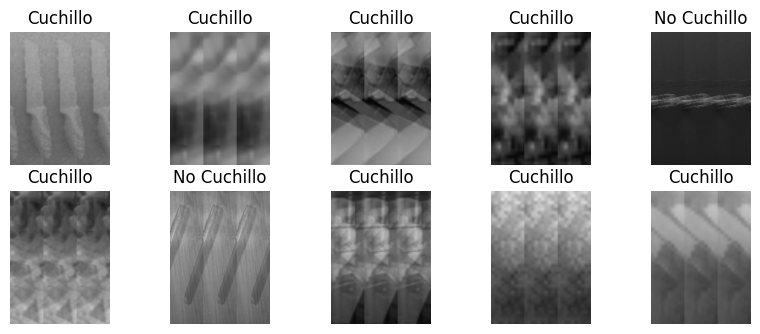

In [99]:
#mostrar como quedo las categorias aleatoriamente
import matplotlib.pyplot as plt
import random
plt.figure(figsize=(10, 10))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    img, etiqueta = random.choice(data_train)
    plt.imshow(img.reshape(800, 600), cmap='gray')
    plt.title("Cuchillo" if etiqueta == 0 else "No Cuchillo") 
    plt.axis("off")
plt.show()

In [94]:
X = [] #imgs de entrada(pixeles)
y = [] #label (cuchillo o no cuchillo)

for img, etiqueta in data_train:
    X.append(img)
    y.append(etiqueta)

In [95]:
X

[array([[[ 89],
         [ 89],
         [ 89],
         ...,
         [178],
         [178],
         [178]],
 
        [[178],
         [178],
         [179],
         ...,
         [ 80],
         [ 81],
         [ 82]],
 
        [[ 83],
         [ 84],
         [ 85],
         ...,
         [ 75],
         [ 75],
         [ 75]],
 
        ...,
 
        [[ 30],
         [ 30],
         [ 30],
         ...,
         [175],
         [176],
         [176]],
 
        [[176],
         [176],
         [176],
         ...,
         [ 61],
         [ 61],
         [ 61]],
 
        [[ 62],
         [ 62],
         [ 62],
         ...,
         [130],
         [130],
         [130]]], shape=(800, 600, 1), dtype=uint8),
 array([[[ 89],
         [ 89],
         [ 89],
         ...,
         [180],
         [180],
         [180]],
 
        [[179],
         [179],
         [179],
         ...,
         [ 80],
         [ 79],
         [ 79]],
 
        [[ 79],
         [ 79],
         [ 79],

In [96]:

import numpy as np
X = np.array(X).astype(float) / 255.0

MemoryError: Unable to allocate 11.4 GiB for an array with shape (3196, 800, 600, 1) and data type float64

In [47]:
X

[array([[[ 89],
         [ 89],
         [ 89],
         ...,
         [178],
         [178],
         [178]],
 
        [[178],
         [178],
         [179],
         ...,
         [ 80],
         [ 81],
         [ 82]],
 
        [[ 83],
         [ 84],
         [ 85],
         ...,
         [ 75],
         [ 75],
         [ 75]],
 
        ...,
 
        [[ 30],
         [ 30],
         [ 30],
         ...,
         [175],
         [176],
         [176]],
 
        [[176],
         [176],
         [176],
         ...,
         [ 61],
         [ 61],
         [ 61]],
 
        [[ 62],
         [ 62],
         [ 62],
         ...,
         [130],
         [130],
         [130]]], shape=(800, 600, 1), dtype=uint8),
 array([[[ 89],
         [ 89],
         [ 89],
         ...,
         [180],
         [180],
         [180]],
 
        [[179],
         [179],
         [179],
         ...,
         [ 80],
         [ 79],
         [ 79]],
 
        [[ 79],
         [ 79],
         [ 79],

In [49]:
y 

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [51]:
y = np.array(y) # 

In [52]:
y

array([0, 0, 0, ..., 1, 1, 1], shape=(3196,))

In [53]:
X.shape

AttributeError: 'list' object has no attribute 'shape'

# Arquitectura e Hiperparametros

In [20]:
modelCNN = tf.keras.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(800,600, 1)),
    tf.keras.layers.MaxPooling2D(2,2), # reduce el tamaño de la imagen, toma el valor maximo de cada 2x2

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


c:\Users\lucia\Desktop\Proyecto Final de IA\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
modelCNN.compile(optimizer='adam',
                 loss= 'binary_crossentropy',
                 metrics=['accuracy'])

In [22]:

from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

early = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# div del dataset
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42, shuffle=True
)

history=modelCNN.fit(X_train,
             y_train,
             batch_size=64,
             epochs=15,
             validation_data=(X_val, y_val),
             callbacks=[early]) 

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.4878 - loss: 1.6992

KeyboardInterrupt: 

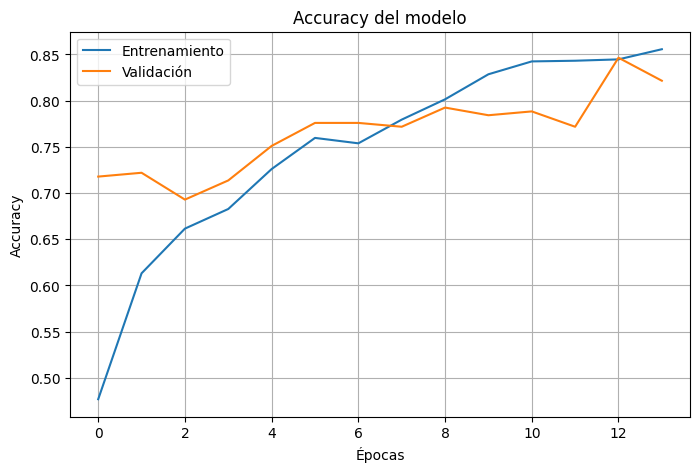

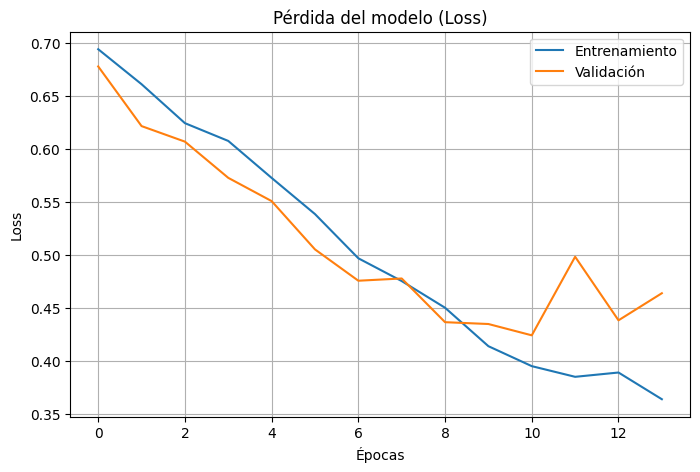

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Accuracy del modelo')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
modelCNN.save("modelo_cnn++.h5")

In [ ]:
def test_random_image(modelo, cuchillo, no_cuchillo):
    todas = []

    for img in os.listdir(cuchillo):
        todas.append((os.path.join(cuchillo, img), 0))  # 0 = cuchillo

    for img in os.listdir(no_cuchillo):
        todas.append((os.path.join(no_cuchillo, img), 1))  # 1 = no cuchillo

    path_img, etiqueta_real = random.choice(todas)


    img = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (TAMANO_IMG, TAMANO_IMG))

    # Preparar para modelo
    input_modelo = img_resized.reshape(1, TAMANO_IMG, TAMANO_IMG, 1).astype("float32") / 255.0

    # Predicción
    prob_no = float(modelo.predict(input_modelo, verbose=0)[0][0])
    prob_si = 1.0 - prob_no

    # Mostrar imagen
    plt.imshow(img_resized, cmap='gray')
    plt.title(f"Imagen: {os.path.basename(path_img)}")
    plt.axis("off")
    plt.show()

    # Imprimir resultados
    
    print(f"Etiqueta real: {'CUCHILLO' if etiqueta_real == 0 else 'NO CUCHILLO'}")
    print(f"Prob NO cuchillo = {prob_no:.4f}")
    print(f"Prob SI cuchillo = {prob_si:.4f}")

    # Predicción final
    if prob_si > 0.5:
        print("Pred: ** CUCHILLO** ")
    else:
        print("Pred: ** NO CUCHILLO**")
    

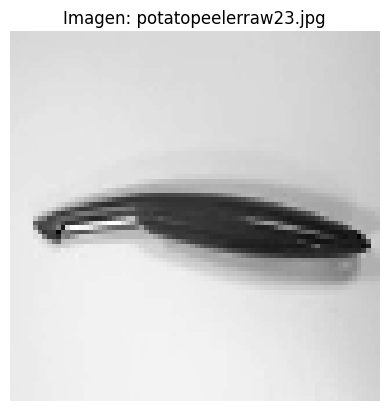

Etiqueta real: NO CUCHILLO
Prob NO cuchillo = 0.5357
Prob SI cuchillo = 0.4643
Pred: ** NO CUCHILLO**


In [ ]:
from tensorflow.keras.models import load_model
modelo = load_model("modelo_cnn++.h5")

test_random_image(
    modelo,
    cuchillo="knife_dataset++/cuchillo",
    no_cuchillo="knife_dataset++/no_cuchillo"
)

Multiclase

In [ ]:
# 0 → cuchillo
# 1 → no_cuchillo
# 2 → navaja
# 3 → cutter


# dataset/
#     cuchillo/
#     no_cuchillo/
#     tijera/
#     cutter/


In [ ]:
categorias = ["cuchillo", "no_cuchillo", "tijera", "cutter"]
num_clases = len(categorias)

In [ ]:
Dense(num_clases, activation='softmax')


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
pred = modelo.predict(input_modelo)
clase = np.argmax(pred)
print("Clase predicha:", categorias[clase])

In [ ]:
num_clases = len(categorias)

modelCNN = tf.keras.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(80, 80, 1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_clases, activation='softmax')
])

modelCNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


MLP